<a href="https://colab.research.google.com/github/kolebauer/BankCampaign/blob/main/SPTargetedMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## Project Notes

-
-
-  

---

# Stakeholder Questions

## Question 1

__Should we use supervised or unsupervised learning?__

- I believe using an Unsupervised learning algorithm will provide us with the best possible results to locate customers most likely to subscribe to a term deposit.
- The reason I support an unsupervised learning algorithm for this project is because they are designed to use unlabed data, meaning the data is not paired with preset groupings and expectations. This way we can uncover hidden patterns, structures, or relationships within the data and avoid potential false groupings due to preset pairing. We are trying to find the relationships between the customers that can tell us if they are more likely to subscribe to a term deposit. Using a supervised learning algorithm means we already know the type of people who are likely to subscribe.


## Question 2

__How should we split the data for training/testing?__

- I believe we should use a k-Fold Cross Validation method for training/testing.


## Question 3

__Are there secondary insights regarding timing or customer types?__

-
-
-


## Question 4

__Are there GDPR considerations for using this data?__  

-
-
-

---

## Key Visual Insights

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

sns.set_theme(style="darkgrid")

bank_data = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv")
# Include and execute your code here

# bank_data.head()

successful_campaign = bank_data[(bank_data["y"] == "yes")]
successful_campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
67,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
75,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
79,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
116,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
125,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


#### Successful Campaign



In [4]:
successful_campaign["nr.employed"].value_counts()

,count
nr.employed,
5099.1,996
5228.1,783
5076.2,527
5017.5,419
4991.6,364
5008.7,344
4963.6,277
5195.8,212
5191.0,208


#### All Data

In [5]:
bank_data["nr.employed"].value_counts()

,count
nr.employed,
5228.1,14605
5099.1,7640
5191.0,7001
5195.8,3314
5076.2,1520
5017.5,973
4991.6,692
5008.7,594
4963.6,572


## Model Overview

- Brief description of model(s) used

- Why we chose this model

- General performance

In [134]:
# Model
X = bank_data[['marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']]
X = pd.get_dummies(X, columns=['marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week'])

y = bank_data[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = KNeighborsClassifier(n_neighbors=100)
clf.fit(X_train, y_train)

# Predictions
X_pred = clf.predict(X_test)
X_pred

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [135]:
# Accuracy Score
sklearn_score = accuracy_score(y_test, X_pred)
sklearn_score

0.8992896322273177

In [132]:
# Confusion Matrix
sklearn_cm = confusion_matrix(y_test, X_pred)
sklearn_cm

array([[9717,  187],
       [ 923,  294]])

<Axes: >

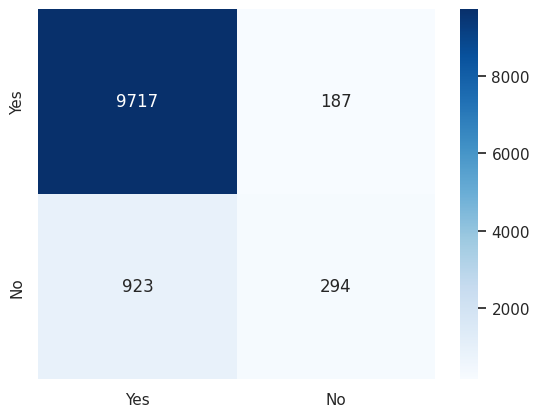

In [133]:
# Heatmap
cm_df = pd.DataFrame(sklearn_cm, index=["Yes", "No"], columns=["Yes", "No"])
# cm_df
sns.heatmap(cm_df, annot=True, fmt='2g', cmap="Blues")

## Reccomendations

- Actionable insights for the bank (which customer types to target)

---

# Data Dictionary for the Banking dataset

We run campaigns periodically. In each campaign, we select a random set of customers, some of which we have already contacted in a previous campaign.

This dataset contains a random set of customers we'd like to target. Some of them have been contacted previously, others haven't been. You can tell how long its been since they were contacted by looking at the "pdays" field and the number of times we've contacted them before by looking at the "previous" field. The "poutcome" field will tell you whether or not the last contact resulted in a successful outcome.

We also have some information about the general economic conditions of the country at the time we last contacted each customer in the sample.


## bank client data:

age (numeric)

job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
- unknown = 0
- divorced = 1
- married = 2
- single = 3



education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

default: has credit in default? (categorical: "no","yes","unknown")
- unknown = 0
- no = 1
- yes = 2

housing: has housing loan? (categorical: "no","yes","unknown")
- unknown = 0
- no = 1
- yes = 2

loan: has personal loan? (categorical: "no","yes","unknown")
- unknown = 0
- no = 1
- yes = 2

## related with the last contact of the current campaign:

contact: contact communication type (categorical: "cellular","telephone")
- cellular = 1
- telephone = 2

month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
- jan = 1
- feb = 2
- mar = 3
- apr = 4
- may = 5
- jun = 6
- jul = 7
- aug = 8
- sep = 9
- oct = 10
- nov = 11
- dec = 12

dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
- mon = 1
- tue = 2
- wed = 3
- thu = 4
- fri = 5

## other attributes:

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

## social and economic context attributes

emp.var.rate: employment variation rate - quarterly indicator (numeric)

cons.price.idx: consumer price index - monthly indicator (numeric)

cons.conf.idx: consumer confidence index - monthly indicator (numeric)

euribor3m: euribor 3 month rate - daily indicator (numeric)

nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):

y - has the client subscribed a term deposit? (binary: "yes","no")

## Missing Attribute Values

There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.